# Methods for summarizing data
- Aggregations refer to any data transformation that produces scalar values from arrays. 
- Not limited to the functions shown below!

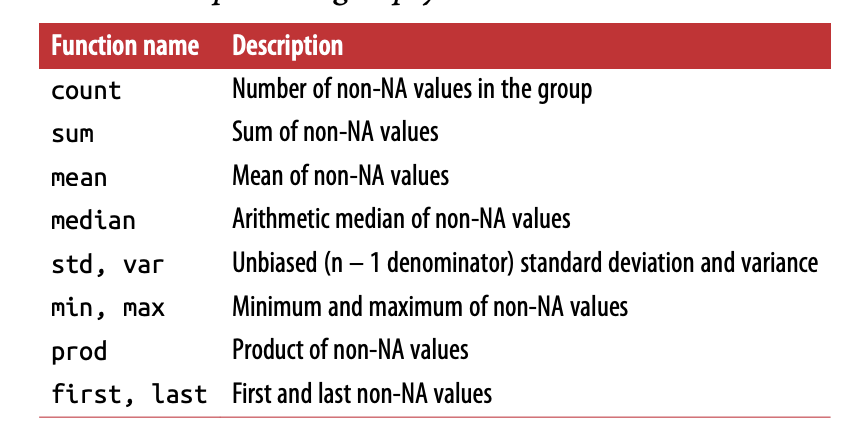

In [44]:
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv") 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Quick statistics with `describe`
- default usages works on numerical data only
- use to get quick summary statistics

In [6]:
df.describe() #default for numerical columns

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Categorical columns show different kind of aggregations

In [8]:
df['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

## Various aggregate methods

In [ ]:
print(df['age'].mean())
print(df['age'].std())
print(df['age'].min())
print(df['age'].max())
print(df['age'].median())

##  Access the numerical columns

In [47]:
floating_point_cols = [a  for a in df.columns if df[a].dtype == 'float64']
df[floating_point_cols].head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


## Calculate row-wise mean
- Calculates a mean for all 5110 rows

In [51]:
df[floating_point_cols].mean(axis=1)

0       110.763333
1       131.605000
2        72.806667
3        84.876667
4        92.373333
           ...    
5105     81.875000
5106     82.066667
5107     49.530000
5108     80.963333
5109     51.826667
Length: 5110, dtype: float64

## We can pass the a summarizing function directly using `agg`
- we can define bespoke summarizing functions e.g. `sumy`
- we also add traditional mean and std, using `mean` and `std`


In [64]:
def sumy(x):
    return x.sum()*2

df[floating_point_cols].agg([sumy,'mean','std'])

,age,avg_glucose_level,bmi
sumy,441776.000000,1.084829e+06,283673.800000
mean,43.226614,1.061477e+02,28.893237
std,22.612647,4.528356e+01,7.854067


# Categorical column functions
- get counts on categorical counts

In [58]:
df['work_type'].value_counts()  # same as above
df.value_counts(['work_type'])

work_type    
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64

-  `normalize=True`  normalizes the counts

In [59]:
df.value_counts(['work_type'],normalize=True)

work_type    
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
dtype: float64

## Counts on unique pairs 

In [56]:
df.value_counts(['work_type','gender'])

work_type      gender
Private        Female    1754
               Male      1170
Self-employed  Female     504
Govt_job       Female     399
children       Male       361
               Female     326
Self-employed  Male       315
Govt_job       Male       258
Never_worked   Female      11
               Male        11
Private        Other        1
dtype: int64